Firstly we'll make the necessary imports and import our dataset from the provided CSV.

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy import linalg
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')


'''
pol_regression.csv is a one-dimensional dataset with inputs x (1 input dimension) and outputs y (1 output dimension).
'''
data_train = pd.DataFrame.from_csv('pol_regression.csv')
data_train.sort_values('x', axis = 0, ascending = True, inplace = True, na_position = 'last')
x_train = data_train['x'].as_matrix()
y_train = data_train['y'].as_matrix()

We will need to arrange a Vandermonde matrix in order to raise the variables to the desired exponents according to the degree of the polynomial.

In [12]:
def getPolynomialDataMatrix(x, degree):
    '''
    This function does exactly the same as np.vander()
    except np.vander() arranges the numbers in the opposite 
    order. Also this runs slightly quicker.
    Essentially arranges a Vandermonde matrix with a row
    for each variable and the amount of columns (and therefore
    the amount of incrementing exponents) is based
    on the degree. 

    For each variable in x, a row : [1, x, x², x³... xⁿ] where n based on the degrees
    '''
    X = np.ones(x.shape)
    for i in range(1,degree + 1):
        X = np.column_stack((X, x ** i))
    
    return X

We will also need a function to estimate a least squares value to get the weights (coefficients) for the equation of our polynomial curve.

$${\boldsymbol{w}} = ({\boldsymbol{X}}^T {\boldsymbol{X}})^{-1} {\boldsymbol{X}}^T\boldsymbol{y}$$

In [13]:
def getWeightsForPolynomialFit(x,y,degree):
    #Least squares estimation to get the weights for the equation
    X = getPolynomialDataMatrix(x, degree)

    XX = X.transpose().dot(X)
    w = np.linalg.solve(XX, X.transpose().dot(y))

    return w

And finally a function to utilise these values to arrange and plot an equation for the curve, returning the coefficients.

In [14]:
def pol_regression(features_train, y_train, degree):
    #Calls function to use least squares solution to get weights
    weights = getWeightsForPolynomialFit(features_train, y_train, degree)  

    yintercept = weights[0]
    print('Y Intercept = ');print(yintercept)


    for i in np.arange(1, len(weights)):            
        yintercept += weights[i] * features_train ** i #Arranges the equation β0 + β1x^1 + β2x^2...

    line = yintercept #in this case the variable is no longer just the y-intercept but we've built the 
                      #rest of the equation up on top of it, so we make a new variable to make this clear

    plt.plot(features_train, line)        
    plt.title('Polynomial Fit')

    plt.xlabel('x')
    plt.ylabel('y') 
    #plt.show()
    return weights

We'll use all these functions together in order to plot a line for our values.

Y Intercept = 
-20.09982760325155
Y Intercept = 
5.5141039995525
Y Intercept = 
0.44240766994443415
Y Intercept = 
-1.872020996151997
Y Intercept = 
-2.886915153512243


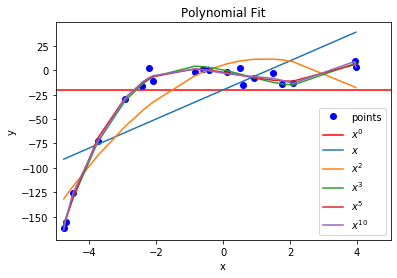

In [15]:
weights = getWeightsForPolynomialFit(x_train, y_train, 1)  

yintercept = weights[0]


plt.plot(x_train, y_train, 'bo') 
line0 = plt.axhline(y=yintercept, color='r', linestyle='-')
line1 = pol_regression(x_train, y_train, 1)
line2 = pol_regression(x_train, y_train, 2)
line3 = pol_regression(x_train, y_train, 3)
line4 = pol_regression(x_train, y_train, 5)
line5 = pol_regression(x_train, y_train, 10)


#np.mean(y_train) and plot like ususal 

plt.legend(('points', '$x^0$','$x$', '$x^2$', '$x^3$', '$x^5$','$x^{10}$'), loc = 'lower right')
axes = plt.gca() #x and y
axes.set_xlim([-5,5]) #as per brief

plt.show()

To evaluate our current model we'll compute the RMSE using training and testing data to validate performance.

In [16]:

def eval_pol_regression(parameters, x, y, degree):
    
    polydata1 = pd.read_csv('pol_regression.csv')
    poly2 = polydata1.sample(frac=1)

    train_data = poly2[0:(int(round(len(poly2)*0.7)))]
    test_data = poly2[(int(round(len(poly2)*0.7))):(len(poly2))]

    print('Amount of training points:');print(len(train_data))
    print('Amount of testing points:');print(len(test_data))


    x_train = train_data['x'].values
    y_train = train_data['y'].values

    x_test = test_data['x'].values
    y_test = test_data['y'].values

    print('X and Y Train')
    print(x_train)
    print(y_train)

    print('X and Y Test')
    print(x_test)
    print(y_test)
    rmse_train = np.zeros((9,1))
    rmse_test = np.zeros((9,1))

    
    for i in range(1,10):
        Xtrain2 = getPolynomialDataMatrix(x_train,i)
        Xtest2 = getPolynomialDataMatrix(x_test,i)
        if i>=1:
            w = getWeightsForPolynomialFit(x_train,y_train,i)
        elif i == 0:
            w = np.mean(y_train)
        rmse_train[i-1] = np.sqrt(np.mean((Xtrain2.dot(w)-y_train)**2)) #Root mean squared error
        rmse_test[i-1] = np.sqrt(np.mean((Xtest2.dot(w)-y_test)**2)) #Root mean squared error
    
    '''
    Xtrain2 = getPolynomialDataMatrix(x_train,degree)
    Xtest2 = getPolynomialDataMatrix(x_test,degree)
    if degree>=1:
        w = getWeightsForPolynomialFit(x_train,y_train,degree)
    elif degree == 0:
        w = np.mean(y_train)
    rmse_train[degree-1] = np.sqrt(np.mean((Xtrain2.dot(w)-y_train)**2)) #Root mean squared error
    rmse_test[degree-1] = np.sqrt(np.mean((Xtest2.dot(w)-y_test)**2)) #Root mean squared error
    '''
    plt.plot(range(1,10),rmse_train)
    plt.plot(range(1,10),rmse_test)
    
    #plt.plot(rmse_train)
    #plt.plot(rmse_test)

    plt.legend(('RMSE Training', 'RMSE Testing'))
    plt.xlabel('Order')
    plt.ylabel('Error') 

    plt.show()


Outputting the evaluation:

Amount of training points:
14
Amount of testing points:
6
X and Y Train
[ 3.92946954 -2.21512717 -2.92757122 -2.40747553 -4.70123789  1.49144048
 -0.84898803 -3.7441469   0.50797903 -2.09095261  3.96293089  0.10827605
  2.08147823  0.90862817]
[   9.17492789    2.77258384  -29.93468343  -15.69039107 -155.19292561
   -3.13355664   -2.25910597  -72.55687501    2.23832102  -10.89588121
    3.23708584   -1.58009781  -13.1042694    -7.81882487]
X and Y Test
[-0.59190156  1.76254902 -4.48532797 -0.43166776 -4.76018118  0.58854088]
[   1.586948    -13.62952627 -125.2759435     0.73794027 -162.08424112
  -15.19263956]


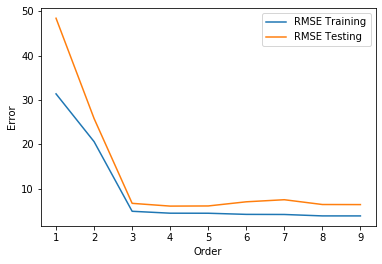

In [17]:
eval_pol_regression(line2, x_train, y_train, 5)
